In [1]:
import os

base_dir = "/content/twitter-sentiment-analysis"
folders = ["data", "notebooks", "models", "visuals"]
for folder in folders:
  os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Project folders created successfully!")

Project folders created successfully!


In [2]:
notebook_path = "/content/twittwe-sentiment-analysis/notebooks/twitter-sentiment-analysis-1.ipynb"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/twitter-sentiment-analysis /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip -o archive\ \(9\).zip -d /content/twitter-sentiment-analysis/data/

Archive:  archive (9).zip
  inflating: /content/twitter-sentiment-analysis/data/Tweets.csv  
  inflating: /content/twitter-sentiment-analysis/data/database.sqlite  


In [5]:
!ls /content/twitter-sentiment-analysis/data/

database.sqlite  Tweets.csv


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/twitter-sentiment-analysis/data/Tweets.csv')

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def clean_tweet(tweet):
    # Lowercase
    tweet = tweet.lower()

    # Remove URLs, mentions, hashtags
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    tweet = re.sub(r'\@\w+|\#','', tweet)

    # Remove punctuation and numbers
    tweet = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', tweet)
    tweet = re.sub(r'\d+', '', tweet)

    # Tokenize
    tokens = nltk.word_tokenize(tweet)

    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(cleaned)

In [14]:
df['clean_text'] = df['text'].apply(clean_tweet)

In [15]:
df[['text', 'clean_text']].head(10)

,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat playing really...
6,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx “ ear worm ” ’ go...
7,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity men without ha...
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",well t…but
9,"@VirginAmerica it was amazing, and arrived an ...",amazing arrived hour early good


In [16]:
!pip install transformers datasets


In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_tokens = tokenizer(list(df['clean_text']), padding=True, truncation=True, return_tensors='pt', max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

import torch
y = torch.tensor(y)


In [19]:
from torch.utils.data import TensorDataset, DataLoader, random_split

dataset = TensorDataset(X_tokens['input_ids'], X_tokens['attention_mask'], y)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16)
val_loader = DataLoader(val_dataset, batch_size=16)


In [20]:
from torch.optim import AdamW

In [21]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(le.classes_))
optimizer = AdamW(model.parameters(), lr=2e-5)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):
    model.train()
    for batch in train_loader:
        b_input_ids, b_attn_mask, b_labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids=b_input_ids, attention_mask=b_attn_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1} completed.")


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.


In [23]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()
preds, true = [], []
with torch.no_grad():
    for batch in val_loader:
        b_input_ids, b_attn_mask, b_labels = [x.to(device) for x in batch]
        outputs = model(input_ids=b_input_ids, attention_mask=b_attn_mask)
        logits = outputs.logits
        preds += torch.argmax(logits, axis=1).cpu().numpy().tolist()
        true += b_labels.cpu().numpy().tolist()

print("Accuracy:", accuracy_score(true, preds))
print(classification_report(true, preds, target_names=le.classes_))


Accuracy: 0.7810792349726776
              precision    recall  f1-score   support

    negative       0.82      0.91      0.87      1802
     neutral       0.62      0.58      0.60       617
    positive       0.81      0.55      0.66       509

    accuracy                           0.78      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.78      0.77      2928



IMPROVEMENT BITCHES

In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Assuming y is your label tensor
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y.numpy()),
                                     y=y.numpy())

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("Class weights:", class_weights)


Class weights: tensor([0.5317, 1.5747, 2.0652], device='cuda:0')


In [25]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,
    hidden_dropout_prob=0.3  # regularize a bit
)
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
from torch.optim import AdamW
from transformers import get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_training_steps = len(train_loader) * 3  # assuming 3 epochs
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer,
    num_warmup_steps=0, num_training_steps=num_training_steps
)


In [27]:
from tqdm import tqdm

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

train_losses = []

model.train()
for epoch in range(3):
    total_loss = 0
    loop = tqdm(train_loader, leave=True)

    for batch in loop:
        b_input_ids, b_attn_mask, b_labels = [x.to(device) for x in batch]

        optimizer.zero_grad()
        outputs = model(input_ids=b_input_ids, attention_mask=b_attn_mask)
        logits = outputs.logits
        loss = loss_fn(logits, b_labels)

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    train_losses.append(total_loss / len(train_loader))


Epoch 3: 100%|██████████| 732/732 [01:33<00:00,  7.82it/s, loss=0.449]


In [28]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        b_input_ids, b_attn_mask, b_labels = [x.to(device) for x in batch]
        outputs = model(input_ids=b_input_ids, attention_mask=b_attn_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        y_true.extend(b_labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=le.classes_))


Accuracy: 0.7824453551912568
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      1802
     neutral       0.60      0.65      0.62       617
    positive       0.66      0.81      0.73       509

    accuracy                           0.78      2928
   macro avg       0.72      0.76      0.74      2928
weighted avg       0.80      0.78      0.79      2928



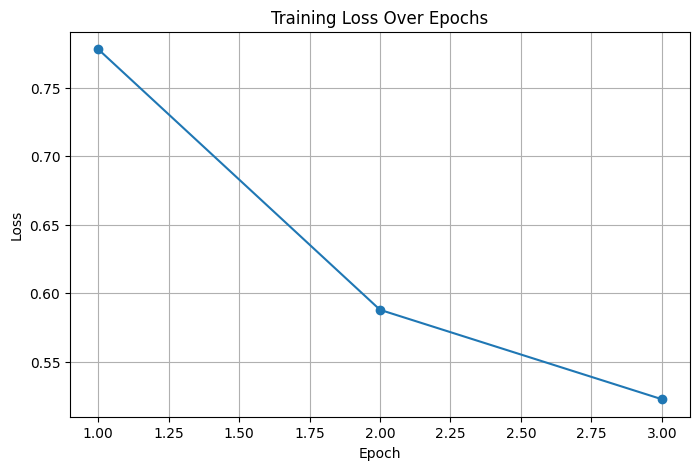

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig("/content/twitter-sentiment-analysis/visuals/loss_plot.png")
plt.show()


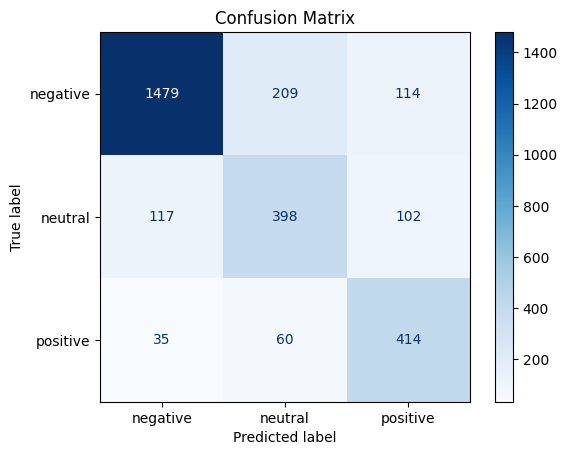

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, display_labels=le.classes_, cmap="Blues", values_format='d'
)
plt.title("Confusion Matrix")
plt.savefig("/content/twitter-sentiment-analysis/visuals/confusion_matrix.png")
plt.show()


In [44]:
model.save_pretrained("/content/twitter-sentiment-analysis/models/bert_sentiment_weighted")
tokenizer.save_pretrained("/content/twitter-sentiment-analysis/models/bert_sentiment_weighted")


('/content/twitter-sentiment-analysis/models/bert_sentiment_weighted/tokenizer_config.json',
 '/content/twitter-sentiment-analysis/models/bert_sentiment_weighted/special_tokens_map.json',
 '/content/twitter-sentiment-analysis/models/bert_sentiment_weighted/vocab.json',
 '/content/twitter-sentiment-analysis/models/bert_sentiment_weighted/merges.txt',
 '/content/twitter-sentiment-analysis/models/bert_sentiment_weighted/added_tokens.json')

In [46]:
# Replace the filename below with your actual notebook name
notebook_name = "twitter-sentiment-analysis-1.ipynb"

# Move to the notebooks folder
!cp "/content/{notebook_name}" "/content/twitter-sentiment-analysis/notebooks/{notebook_name}"


cp: cannot stat '/content/twitter-sentiment-analysis-1.ipynb': No such file or directory


In [47]:
!zip -r twitter-sentiment-analysis.zip twitter-sentiment-analysis/


  adding: twitter-sentiment-analysis/ (stored 0%)
  adding: twitter-sentiment-analysis/visuals/ (stored 0%)
  adding: twitter-sentiment-analysis/visuals/confusion_matrix.png (deflated 13%)
  adding: twitter-sentiment-analysis/visuals/loss_plot.png (deflated 12%)
  adding: twitter-sentiment-analysis/notebooks/ (stored 0%)
  adding: twitter-sentiment-analysis/data/ (stored 0%)
  adding: twitter-sentiment-analysis/data/Tweets.csv (deflated 67%)
  adding: twitter-sentiment-analysis/data/database.sqlite (deflated 69%)
  adding: twitter-sentiment-analysis/models/ (stored 0%)
  adding: twitter-sentiment-analysis/models/bert_sentiment_weighted/ (stored 0%)
  adding: twitter-sentiment-analysis/models/bert_sentiment_weighted/tokenizer_config.json (deflated 76%)
  adding: twitter-sentiment-analysis/models/bert_sentiment_weighted/config.json (deflated 52%)
  adding: twitter-sentiment-analysis/models/bert_sentiment_weighted/vocab.txt (deflated 53%)
  adding: twitter-sentiment-analysis/models/bert_s

In [48]:
!mv twitter-sentiment-analysis.zip /content/drive/MyDrive/
